Importing the required python libraries to perform web scraping analysis


In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud  # Import WordCloud from the wordcloud library
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



We start by **scraping the top 50 user reviews of a movie avengers Endgame** from IMDb. For each review, we calculate its sentiment polarity using TextBlob. The **sentiment analysis** results are divided into positive and negative categories. We will create a bar chart of sentiment analysis.

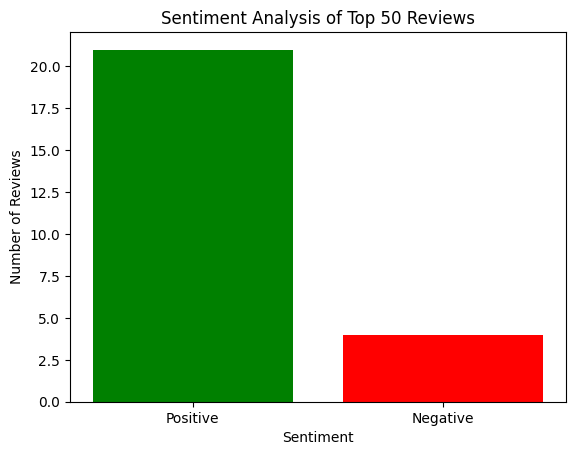

Positive Reviews: 21
Negative Reviews: 4
Average Positive Sentiment: 0.203606940116479
Average Negative Sentiment: -0.12015729166666664


In [2]:

# Define the IMDb URL for a movie review
url = "https://www.imdb.com/title/tt4154796/reviews"

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the review elements
    review_elements = soup.find_all('div', class_='text show-more__control')

    if review_elements:
        # Initialize counters for neutral, negative, and positive reviews
        #neutral_reviews = 0
        negative_reviews = 0
        positive_reviews = 0

        # Lists to store sentiment polarities for each sentiment category
        #neutral_sentiments = []
        negative_sentiments = []
        positive_sentiments = []

        # Initialize a list to store the review texts
        reviews = []

        # Collecting the top 50 reviews and perform sentiment analysis
        for i, review in enumerate(review_elements[:50]):
            review_text = review.get_text()
            reviews.append(review_text)

            # Performing sentiment analysis using TextBlob
            sentiment = TextBlob(review_text)
            sentiment_polarity = sentiment.sentiment.polarity

            if sentiment_polarity > 0:
                positive_reviews += 1
                positive_sentiments.append(sentiment_polarity)
            elif sentiment_polarity < 0:
                negative_reviews += 1
                negative_sentiments.append(sentiment_polarity)


        # Creating a bar chart for sentiment analysis
        labels = ['Positive', 'Negative']
        counts = [positive_reviews, negative_reviews]

        plt.bar(labels, counts, color=['green', 'red'])
        plt.title("Sentiment Analysis of Top 50 Reviews")
        plt.xlabel("Sentiment")
        plt.ylabel("Number of Reviews")


        # Save the bar plot as an image file
        plt.savefig('/content/sample_data/sentiment_analysis.png')
        plt.show()

        print("Positive Reviews:", positive_reviews)
        print("Negative Reviews:", negative_reviews)


        if positive_sentiments:
            print("Average Positive Sentiment:", sum(positive_sentiments) / len(positive_sentiments))
        else:
            print("No positive sentiments found")

        if negative_sentiments:
            print("Average Negative Sentiment:", sum(negative_sentiments) / len(negative_sentiments))
        else:
            print("No negative sentiments found")

    else:
        print("Reviews not found on the page.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


**Sentiment analysis** chart depicts that Most of the reviews are positive as compared to negative in sentiment.

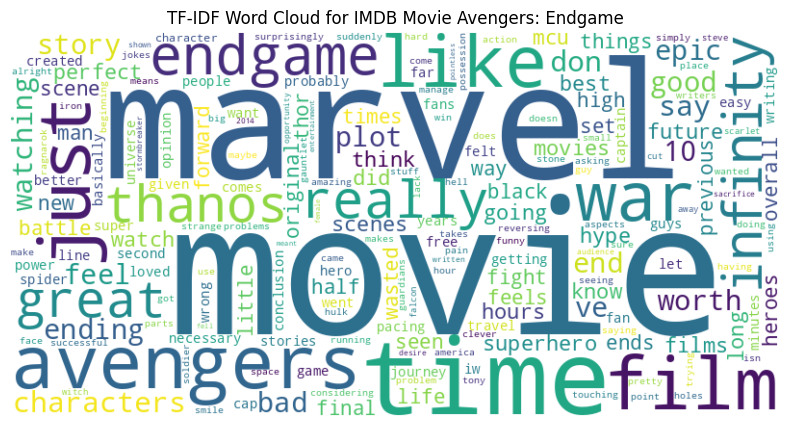

In [3]:
#The word cloud visually represents the most important words in the movie reviews.
#Words that appear larger in the word cloud are considered more important based on their TF-IDF scores.

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=200, stop_words='english')

# Fit and transform the reviews to get TF-IDF values
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()
# Sum TF-IDF scores for each feature (word) across all reviews
total_tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a dictionary of word and TF-IDF score
word_tfidf_dict = dict(zip(feature_names, total_tfidf_scores))
# Generate a word cloud chart
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf_dict)

# Save the word cloud as an image file
wordcloud.to_file('/content/sample_data/wordcloud.png')

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("TF-IDF Word Cloud for IMDB Movie Avengers: Endgame")
plt.show()

With this word cloud we can identify which words are most associated with the movie Avengers endgame in user reviews, providing insights into popular themes or aspects of the film.

Below we will perform **Textual Clustering-**
We pperform clustering the K-Means algorithm to group similar reviews together based on their content. Here we will
create three clusters. Each cluster represents a set of reviews with similar content.

In [4]:
# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the review elements
    review_elements = soup.find_all('div', class_='text show-more__control')
    rating_elements = soup.find_all('span', class_='rating-other-user-rating')

    if review_elements:
        reviews = []
        ratings = []

        # fetching the 50 reviews and their ratings
        num_reviews = min(50, len(review_elements), len(rating_elements))

        for i in range(num_reviews):
            review_text = review_elements[i].get_text()
            reviews.append(review_text)

            rating_text = rating_elements[i].text.strip()
            # Extract the rating from the text
            rating = rating_text.split('/')[0]
            ratings.append(int(rating))

        # Calculating the length (number of words) of each review
        review_lengths = [len(review.split()) for review in reviews]

        # Creating a review dataFrame to store the data
        review_data = pd.DataFrame({'Review': reviews, 'Rating': ratings, 'Review Length': review_lengths})


        # Textual Clustering
        tfidf_vectorizer = TfidfVectorizer(max_features=200, stop_words='english')
        tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

        # creating textual clustering using K-Means clustering algorithm
        num_clusters = 3  # setting the clusters
        kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(tfidf_matrix)

        # Assign cluster labels to reviews
        review_data['Cluster'] = kmeans.labels_

        # Printing the clustered reviews
        for cluster in range(num_clusters):
            print(f"Cluster {cluster + 1} Reviews:")
            print(review_data[review_data['Cluster'] == cluster]['Review'].to_string(index=False))
            print("\n")

    else:
        print("Reviews not found on the page.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Reviews:
But its a pretty good film. A bit of a mess in ...
So it all ends. I have loved most of the MCU, s...
This film is an emotional rollercoaster with so...
The film has too many references to previous Ma...
They've really scrapped the bottom with this on...
great performancesincredible visualsstory ends ...
Unfortunately clumsy. I enjoyed all previous Av...


Cluster 2 Reviews:
After watching Infinity war, I was looking forw...
After Avengers Infinity War, we waited for the ...
Perhaps Infinity War was the film of Thanos in ...
If you're going to watch this movie, avoid any ...
Rating 10/10\nAbsolute perfection end game !! G...
Don't get me wrong, the movie was great, but wo...
I've just come from watching Endgame and I must...
I feel like I'm wasting my time writing down my...
Avengers: Endgame is above all the best Marvel ...
Right in the beginning, you know how the movie ...
The Most Overrated Movie Of All Time. (Will Alw...


Cluster 3 Reviews:
Rating: 8.6Not as goo

With this results. this analysis helps identify common themes or topics in the user reviews.

Below we will perform **Rating Distribution Analysis**-
We extract the user ratings from the reviews and create a distribution chart to visualize how users rate the movie.


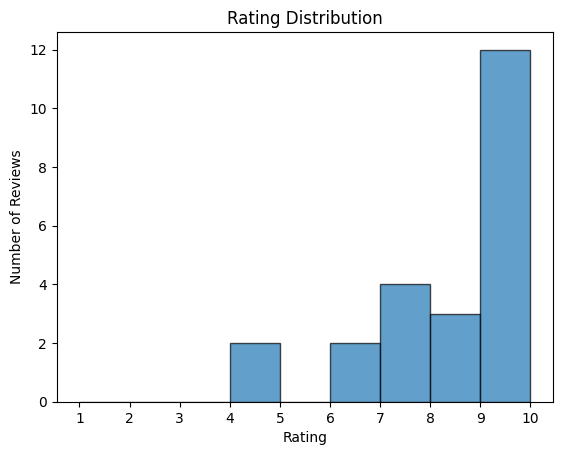

In [5]:
# creating rating Distribution Chart
plt.hist(ratings, bins=range(1, 11), edgecolor='k', alpha=0.7)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.xticks(range(1, 11))
plt.show()

**Rating distribution chart interpretation**-	This displays the distribution of user ratings (1 to 10). It helps us understand how users perceive the movie.

below we will perform **Review Length Analysis-**
We analyze the length of the reviews by counting the number of words in each review. We then create a scatter plot to examine the relationship between review length and user ratings


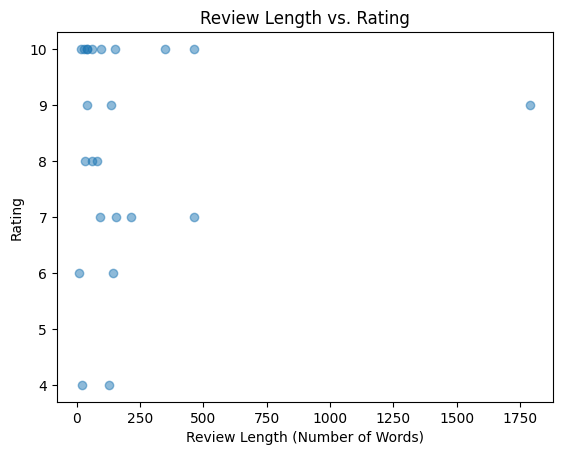

In [6]:
# Here is the review Length Analysis where it shows the correlation review length vs ratings
plt.scatter(review_lengths, ratings, alpha=0.5)
plt.title("Review Length vs. Rating")
plt.xlabel("Review Length (Number of Words)")
plt.ylabel("Rating")
plt.show()

**Review Length Analysis** allows us to explore whether there is a correlation between the length of reviews and the ratings given by users.

The **IMDB Movie rating analysis** provides several valuable insights:
•	Most of the analyzed reviews are generally positive in sentiment.
•	The majority of user ratings fall within the higher range, indicating that users tend to give higher ratings to the movie.
•	There is no clear correlation between review length and user ratings.
•	Textual clustering helps group reviews with similar content, revealing common themes and topics within user reviews.

These insights can be useful for understanding how users perceive the movie and identifying patterns in the reviews. The code and analysis can be applied to different movies and review datasets for further exploration and understanding